In [1]:
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pip install tqdm
from tqdm import tqdm
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
trainingEpochs=15
batch_size=100

In [4]:
x=tf.placeholder(tf.float32,[None,28*28])
y=tf.placeholder(tf.float32,[None,10])

In [5]:
tf.reset_default_graph()

In [6]:
w1=tf.get_variable("w1",shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([256]))
l1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=tf.get_variable("w2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([256]))
l2=tf.nn.relu(tf.matmul(l1,w2)+b2)

w3=tf.get_variable("w3",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([256]))
l3=tf.nn.relu(tf.matmul(l2,w3)+b3)

w4=tf.get_variable("w4",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([256]))
l4=tf.nn.relu(tf.matmul(l3,w4)+b4)

w5=tf.get_variable("w5",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))

hf=tf.matmul(l4,w5)+b5

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



ValueError: Tensor("w1:0", shape=(784, 256), dtype=float32_ref) must be from the same graph as Tensor("Placeholder:0", shape=(?, 784), dtype=float32).

In [10]:
#재비어
# np.random.randn(입력노드수,출력노드수)
# /np.sqrt(입력노드수)
#tf.contrib.layers.xavier_initializer()

#he
# np.random.randn(입력노드수,출력노드수)
# / np.sqrt(입력노드수/2)
#tf.keras.initializers.he_normal()

In [11]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)
prediction=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))
#가중치 업데이트 방법
"""
-전통적 경사하강법은 매번 미분함 => 속도 느림
-확률적 경사하강법(sgd)=>속도 개선
-모멘텀(momentum) sgd => 확률적 경사하강법 + 관성
-아다그리드 => step size 개선
-rmsprop :아다그리드 개선
-아담(Adam) : 모멘텀 + rmsprop
"""

'\n-전통적 경사하강법은 매번 미분함 => 속도 느림\n-확률적 경사하강법(sgd)=>속도 개선\n-모멘텀(momentum) sgd => 확률적 경사하강법 + 관성\n-아다그리드 => step size 개선\n-rmsprop :아다그리드 개선\n-아담(Adam) : 모멘텀 + rmsprop\n'

In [12]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainingEpochs):
    avgCost=0
    totalBatch=int(mnist.train.num_examples/batch_size)
    
    pbar=tqdm(range(totalBatch))    
    for i in pbar:  #in range(totalBatch):
        batchX,batchY=mnist.train.next_batch(batch_size)
        cv,_=sess.run([cost,optimizer],feed_dict={x:batchX,y:batchY,keep_prob:0.7})
        avgCost+=cv/totalBatch
        pbar.set_description("cost:%f" % avgCost)
print("정확도:",sess.run(accuracy,feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    

cost:0.011816: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 177.25it/s]


정확도: 0.9785


      label  predict
18        3        8
104       9        5
149       2        4
247       4        6
264       9        4
...     ...      ...
9764      4        9
9768      2        0
9770      5        0
9779      2        0
9839      2        7

[215 rows x 2 columns]


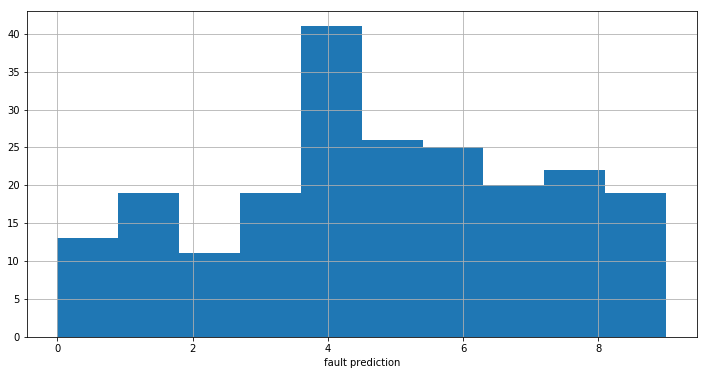

In [17]:
index=[]
ori=[]
pred=[]
labels=sess.run(tf.argmax(mnist.test.labels,1))
predictions=sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images})
for i in range(0, mnist.test.num_examples):
    if predictions[i] != labels[i]:
        index.append(i)
        ori.append(labels[i])
        pred.append(predictions[i])
res=pd.DataFrame({"label":ori, 
                  "predict":pred},
                 index=index)
print(res)
plt.figure(figsize=(12,6))
plt.hist(res['predict'],bins=10)        
plt.xlabel('fault prediction')
plt.grid()
plt.show()

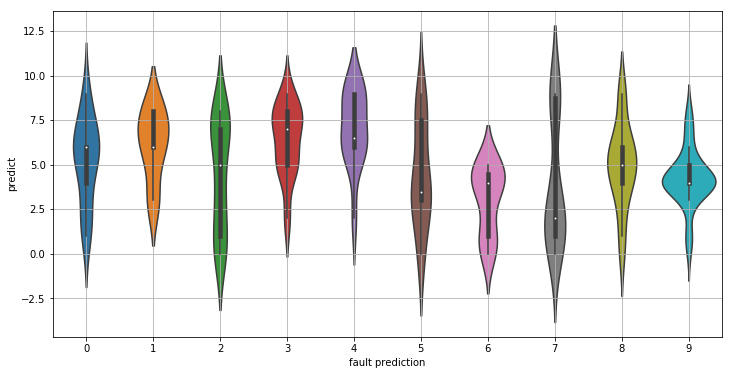

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(x='label',y='predict',data=res)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

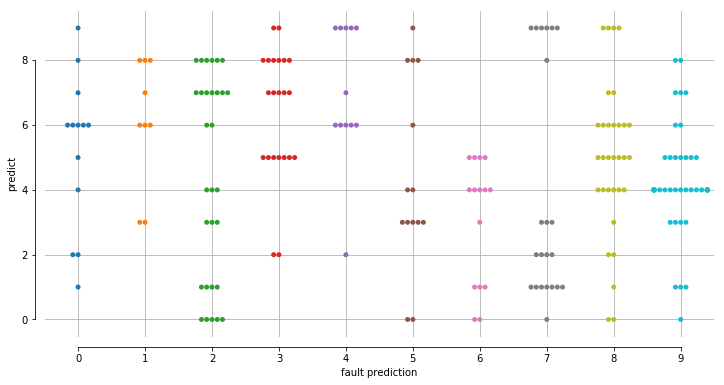

In [19]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='label',y='predict',data=res)
sns.despine(offset=10, trim=True)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [20]:
ver=res.query("label==4").sample(n=8).index

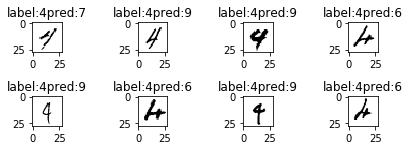

In [26]:
cnt=0
for n in ver:
    cnt+=1
    plt.subplot(4,4,cnt)
    plt.imshow(mnist.test.images[n].reshape(28,28), cmap='Greys')
    t="label:"+str(res['label'][n])
    +"pred:"+str(res['predict'][n])
    plt.title(t)
plt.tight_layout()
plt.show()

In [27]:
#pima 인디안 분석

In [28]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [29]:
#seed생성
np.random.seed(42)
tf.set_random_seed(42)

In [31]:
data=np.loadtxt("pima-indians-diabetes.csv",delimiter=",")

In [35]:
x=data[:,0:8]
y=data[:,8]

In [39]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [40]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
model.fit(x,y,epochs=200,batch_size=10)




Epoch 1/200
768/768 [==============================] - ETA: 27s - loss: 23.9541 - accuracy: 0.40 - ETA: 0s - loss: 15.4032 - accuracy: 0.3483 - 0s 578us/step - loss: 12.6002 - accuracy: 0.3568
Epoch 2/200
768/768 [==============================] - ETA: 0s - loss: 2.8568 - accuracy: 0.40 - ETA: 0s - loss: 1.7834 - accuracy: 0.52 - 0s 98us/step - loss: 1.6268 - accuracy: 0.5404
Epoch 3/200
768/768 [==============================] - ETA: 0s - loss: 1.3739 - accuracy: 0.60 - ETA: 0s - loss: 1.1728 - accuracy: 0.59 - 0s 103us/step - loss: 1.1515 - accuracy: 0.6029
Epoch 4/200
768/768 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.50 - ETA: 0s - loss: 1.1000 - accuracy: 0.59 - 0s 108us/step - loss: 1.0529 - accuracy: 0.5964
Epoch 5/200
768/768 [==============================] - ETA: 0s - loss: 0.9609 - accuracy: 0.40 - ETA: 0s - loss: 0.9688 - accuracy: 0.59 - 0s 115us/step - loss: 0.9574 - accuracy: 0.5977
Epoch 6/200
768/768 [==============================] - ET

Epoch 85/200
768/768 [==============================] - ETA: 0s - loss: 0.4741 - accuracy: 0.60 - ETA: 0s - loss: 0.5169 - accuracy: 0.74 - 0s 89us/step - loss: 0.5194 - accuracy: 0.7435
Epoch 86/200
768/768 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.90 - ETA: 0s - loss: 0.5066 - accuracy: 0.75 - 0s 91us/step - loss: 0.5136 - accuracy: 0.7487
Epoch 87/200
768/768 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 1.00 - ETA: 0s - loss: 0.5496 - accuracy: 0.74 - 0s 94us/step - loss: 0.5385 - accuracy: 0.7474
Epoch 88/200
768/768 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.90 - ETA: 0s - loss: 0.5264 - accuracy: 0.74 - 0s 89us/step - loss: 0.5262 - accuracy: 0.7396
Epoch 89/200
768/768 [==============================] - ETA: 0s - loss: 0.2790 - accuracy: 0.90 - ETA: 0s - loss: 0.5410 - accuracy: 0.72 - 0s 87us/step - loss: 0.5356 - accuracy: 0.7227
Epoch 90/200
768/768 [==============================] - ETA: 0s -

768/768 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.90 - ETA: 0s - loss: 0.4744 - accuracy: 0.77 - 0s 102us/step - loss: 0.4787 - accuracy: 0.7760
Epoch 172/200
768/768 [==============================] - ETA: 0s - loss: 0.5912 - accuracy: 0.70 - ETA: 0s - loss: 0.5023 - accuracy: 0.73 - 0s 100us/step - loss: 0.4933 - accuracy: 0.7422
Epoch 173/200
768/768 [==============================] - ETA: 0s - loss: 0.4491 - accuracy: 0.80 - ETA: 0s - loss: 0.5119 - accuracy: 0.73 - 0s 100us/step - loss: 0.4926 - accuracy: 0.7565
Epoch 174/200
768/768 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.80 - ETA: 0s - loss: 0.4862 - accuracy: 0.75 - 0s 92us/step - loss: 0.4930 - accuracy: 0.7500
Epoch 175/200
768/768 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.70 - ETA: 0s - loss: 0.4947 - accuracy: 0.76 - 0s 94us/step - loss: 0.4853 - accuracy: 0.7708
Epoch 176/200
768/768 [==============================] - ETA: 0s - loss

In [46]:
model.evaluate(x,y)[1]

768/768 [==============================] - ETA:  - 0s 14us/step


0.7838541865348816

In [47]:
from keras.datasets import mnist
(trainImage,trainLabel),
(testImage,testLabel)=mnist.load_data()

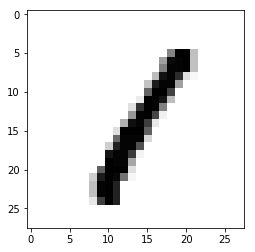

In [48]:
digit=trainImage[3]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [50]:
model2=Sequential()
model2.add(Dense(512, input_shape=(28*28,), 
                 activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [51]:
model2.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [52]:
trainImage=trainImage.reshape((60000,28*28))
trainImage=trainImage.astype('float32')/255
testImage=testImage.reshape((10000,28*28))
testImage=testImage.astype('float32')/255

In [54]:
from keras.utils import to_categorical
trainLabel=to_categorical(trainLabel)
testLabel=to_categorical(testLabel)

In [55]:
model2.fit(trainImage,trainLabel, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - ETA: 49s - loss: 2.3331 - accuracy: 0.125 - ETA: 8s - loss: 1.3432 - accuracy: 0.589 - ETA: 5s - loss: 1.0648 - accuracy: 0.68 - ETA: 5s - loss: 0.8954 - accuracy: 0.73 - ETA: 4s - loss: 0.7988 - accuracy: 0.76 - ETA: 4s - loss: 0.7294 - accuracy: 0.78 - ETA: 4s - loss: 0.6794 - accuracy: 0.80 - ETA: 3s - loss: 0.6371 - accuracy: 0.81 - ETA: 3s - loss: 0.6050 - accuracy: 0.82 - ETA: 3s - loss: 0.5828 - accuracy: 0.83 - ETA: 3s - loss: 0.5588 - accuracy: 0.84 - ETA: 3s - loss: 0.5339 - accuracy: 0.84 - ETA: 3s - loss: 0.5189 - accuracy: 0.85 - ETA: 3s - loss: 0.5038 - accuracy: 0.85 - ETA: 3s - loss: 0.4877 - accuracy: 0.85 - ETA: 3s - loss: 0.4774 - accuracy: 0.86 - ETA: 3s - loss: 0.4683 - accuracy: 0.86 - ETA: 3s - loss: 0.4583 - accuracy: 0.86 - ETA: 2s - loss: 0.4458 - accuracy: 0.87 - ETA: 2s - loss: 0.4382 - accuracy: 0.87 - ETA: 2s - loss: 0.4295 - accuracy: 0.87 - ETA: 2s - loss: 0.4174 - accuracy: 0.87 - ETA: 2s - loss: 

In [57]:
l, a=model2.evaluate(testImage, testLabel)
a

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 41us/step


0.98089998960495

In [58]:
"""
일반적(텐서플로) : 이미지(128, 높이, 너비, 3)
씨아노 : 이미지(128, 3, 높이, 너비)

비디오 : 5차원 텐서, 프레임(이미지)의 연속
(프레임, 높이,너비, 채널)
ex) 60초 짜리, 100*200 유투브 비디오,
초당 4프레임을 샘플링
4*60=240프레임
비디오 클립 5개
(5, 240, 100, 200, 3)

"""

'\n일반적(텐서플로) : 이미지(128, 높이, 너비, 3)\n씨아노 : 이미지(128, 3, 높이, 너비)\n\n비디오 : 5차원 텐서, 프레임(이미지)의 연속\n(프레임, 높이,너비, 채널)\nex) 60초 짜리, 100*200 유투브 비디오,\n초당 4프레임을 샘플링\n4*60=240프레임\n비디오 클립 5개\n(5, 240, 100, 200, 3)\n\n'

In [59]:
#영화 리뷰 분류
from keras.datasets import imdb

In [60]:
(trainData,trainLabel),(testData,testLabel)=
imdb.load_data(num_words=10000)
#자주 사용된 10000개 단어만 추출 사용

15671296/17464789 [=========================>....] - ETA:  - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: -

In [66]:
trainData[0]
trainLabel[0] #긍정

218

In [72]:
print(max([max(seq) for seq in trainData]))

9999


In [74]:
wordIndex=imdb.get_word_index()
wordIndex

1646592/1641221 [==============================] - ETA: 2: - ETA: 47s - ETA: 47 - ETA: 45 - ETA: 46 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 38 - ETA: 40 - ETA: 38 - ETA: 37 - ETA: 38 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 43s 26us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [79]:
rev_wordIndex=dict([(value,key) for (key,value) in wordIndex.items()])

In [99]:
#i가 0, 1, 2, 3 일때는 "?"를 get
decReview=" ".join([rev_wordIndex.get(i-3, "?") 
          for i in trainData[0]])

In [100]:
decReview

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [101]:
#동일한 길이의 리스트가 되도록 패딩 작업수행
#원핫인코딩

In [103]:
def vec_seq(data, dim=10000):
    res=np.zeros((len(data),dim))
    for i, s in enumerate(data):
        res[i,s]=1
    return res    
xTrain=vec_seq(trainData)
xTest=vec_seq(testData)
    #훈련데이터 -> 벡터로 변환

In [114]:
xTrain.shape

(25000, 10000)

In [118]:
yTrain=trainLabel.astype('float32')
yTest=testLabel.astype('float32')

In [121]:
yTest.shape

(25000,)

In [123]:
#신경망 모델
model=Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [124]:
model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=['accuracy'])

In [127]:
xVal=xTrain[:10000]
p_xTrain=xTrain[10000:]
yVal=yTrain[:10000]
p_yTrain=yTrain[10000:]

In [128]:
history=model.fit(p_xTrain,p_yTrain,epochs=20, 
                  batch_size=512, 
                  validation_data=(xVal,yVal))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - ETA: 4s - loss: 0.6904 - accuracy: 0.53 - ETA: 3s - loss: 0.6824 - accuracy: 0.58 - ETA: 2s - loss: 0.6706 - accuracy: 0.63 - ETA: 2s - loss: 0.6635 - accuracy: 0.63 - ETA: 2s - loss: 0.6600 - accuracy: 0.63 - ETA: 1s - loss: 0.6528 - accuracy: 0.63 - ETA: 1s - loss: 0.6432 - accuracy: 0.66 - ETA: 1s - loss: 0.6361 - accuracy: 0.67 - ETA: 1s - loss: 0.6291 - accuracy: 0.68 - ETA: 1s - loss: 0.6223 - accuracy: 0.69 - ETA: 1s - loss: 0.6154 - accuracy: 0.70 - ETA: 1s - loss: 0.6063 - accuracy: 0.71 - ETA: 1s - loss: 0.5999 - accuracy: 0.72 - ETA: 1s - loss: 0.5928 - accuracy: 0.73 - ETA: 1s - loss: 0.5873 - accuracy: 0.73 - ETA: 0s - loss: 0.5811 - accuracy: 0.74 - ETA: 0s - loss: 0.5747 - accuracy: 0.74 - ETA: 0s - loss: 0.5689 - accuracy: 0.75 - ETA: 0s - loss: 0.5633 - accuracy: 0.75 - ETA: 0s - loss: 0.5577 - accuracy: 0.76 - ETA: 0s - loss: 0.5513 - accuracy: 0.76 - ETA: 0s - 

Epoch 7/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0778 - accuracy: 0.98 - ETA: 1s - loss: 0.0862 - accuracy: 0.97 - ETA: 1s - loss: 0.0810 - accuracy: 0.98 - ETA: 1s - loss: 0.0792 - accuracy: 0.98 - ETA: 1s - loss: 0.0778 - accuracy: 0.98 - ETA: 1s - loss: 0.0816 - accuracy: 0.98 - ETA: 1s - loss: 0.0820 - accuracy: 0.98 - ETA: 1s - loss: 0.0845 - accuracy: 0.97 - ETA: 1s - loss: 0.0895 - accuracy: 0.97 - ETA: 1s - loss: 0.0898 - accuracy: 0.97 - ETA: 1s - loss: 0.0914 - accuracy: 0.97 - ETA: 0s - loss: 0.0946 - accuracy: 0.97 - ETA: 0s - loss: 0.0947 - accuracy: 0.97 - ETA: 0s - loss: 0.0948 - accuracy: 0.97 - ETA: 0s - loss: 0.0945 - accuracy: 0.97 - ETA: 0s - loss: 0.0950 - accuracy: 0.97 - ETA: 0s - loss: 0.0953 - accuracy: 0.97 - ETA: 0s - loss: 0.0948 - accuracy: 0.97 - ETA: 0s - loss: 0.0950 - accuracy: 0.97 - ETA: 0s - loss: 0.0951 - accuracy: 0.97 - ETA: 0s - loss: 0.0956 - accuracy: 0.97 - ETA: 0s - loss: 0.0962 - accuracy: 0.97 - ETA: 0s - loss: 0.

Epoch 13/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0306 - accuracy: 0.99 - ETA: 1s - loss: 0.0254 - accuracy: 0.99 - ETA: 1s - loss: 0.0278 - accuracy: 0.99 - ETA: 1s - loss: 0.0262 - accuracy: 0.99 - ETA: 1s - loss: 0.0255 - accuracy: 0.99 - ETA: 1s - loss: 0.0260 - accuracy: 0.99 - ETA: 1s - loss: 0.0270 - accuracy: 0.99 - ETA: 1s - loss: 0.0277 - accuracy: 0.99 - ETA: 1s - loss: 0.0275 - accuracy: 0.99 - ETA: 1s - loss: 0.0274 - accuracy: 0.99 - ETA: 1s - loss: 0.0276 - accuracy: 0.99 - ETA: 0s - loss: 0.0271 - accuracy: 0.99 - ETA: 0s - loss: 0.0271 - accuracy: 0.99 - ETA: 0s - loss: 0.0277 - accuracy: 0.99 - ETA: 0s - loss: 0.0279 - accuracy: 0.99 - ETA: 0s - loss: 0.0281 - accuracy: 0.99 - ETA: 0s - loss: 0.0283 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0290 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 19/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0064 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0052 - accuracy: 1.00 - ETA: 1s - loss: 0.0055 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0055 - accuracy: 1.00 - ETA: 1s - loss: 0.0053 - accuracy: 1.00 - ETA: 1s - loss: 0.0056 - accuracy: 0.99 - ETA: 1s - loss: 0.0061 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 1s - loss: 0.0060 - accuracy: 0.99 - ETA: 0s - loss: 0.0062 - accuracy: 0.99 - ETA: 0s - loss: 0.0062 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0065 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0064 - accuracy: 0.99 - ETA: 0s - loss: 0.0063 - accuracy: 0.99 - ETA: 0s - loss: 0

In [135]:
historyDict=history.history
historyDict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [137]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

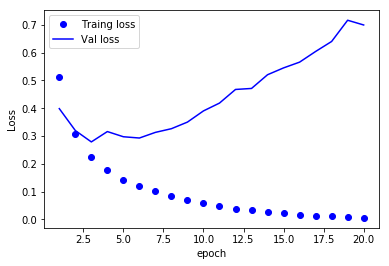

In [139]:
epo=range(1,len(acc)+1)
plt.plot(epo, loss, 'bo', label="Traing loss")
plt.plot(epo, val_loss, 'b', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

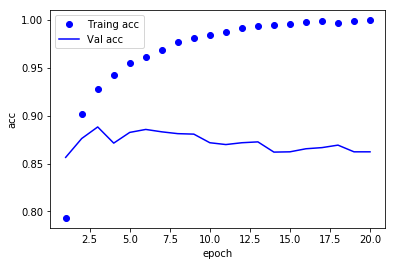

In [140]:
plt.plot(epo, acc, 'bo', label="Traing acc")
plt.plot(epo, val_acc, 'b', label="Val acc")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [141]:
model.evaluate(xTest,yTest)

25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 139us/step


[0.7668838533973694, 0.8485999703407288]

model.predict(xTest)

In [142]:
model.predict(xTest)

array([[0.00452176],
       [1.        ],
       [0.9617934 ],
       ...,
       [0.00356573],
       [0.01140317],
       [0.40021524]], dtype=float32)

In [7]:
from keras.datasets import boston_housing

In [8]:
(trainData,trainTargets), (testData,testTargets)=boston_housing.load_data()

57344/57026 [==============================] - ETA:  - ETA:  - 0s 8us/step


In [16]:
trainData.shape
trainTargets
testData.shape
testTargets
#loss='mse', optimizer='rmsprop',metrics=['mae']
#ex) mae가 0.5 -> 실제와 예측 차이:0.5 -> 500달러 차이
#케라스, 텐서플로우

#아이리스 품종 분류기 :  iris.csv 파일
#loss=categorical_crossentropy, optimizer=adm
#metrics=accuracy
#케라스, 텐서플로우

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])